In this notebook, we are going to reanalyze the data that made Semmelweis discover the importance of handwashing

In [1]:
import numpy as np
import pandas as pd

In [2]:
yearly=pd.read_csv("yearly_deaths_by_clinic.csv")
yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


task-2:
    The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You wll notice that giving birth was very dangerous; an alarming number of women died as the result of childbirth, most of them from childbed fever.

In [3]:
yearly["proportion_deaths"] = yearly["deaths"] / yearly["births"]
yearly1 = yearly[yearly["clinic"] == "clinic 1"]
yearly2 = yearly[yearly["clinic"] == "clinic 2"]
print("Yearly1:")
print(yearly1)

Yearly1:
   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


task-3:
we now plot the proportion of deaths at both clinic 1 and clinic 2 we'll see a pattern

In [4]:
import matplotlib.pyplot as plt

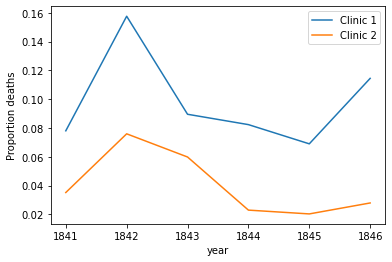

In [5]:
ax = yearly1.plot(x="year", y="proportion_deaths", label="Clinic 1")
yearly2.plot(x="year", y="proportion_deaths", label="Clinic 2", ax=ax)
ax.set_ylabel("Proportion deaths")
ax.legend()
plt.show()


task-4:
Lets  load in monthly data from Clinic 1 to see if the handwashing had any effect. 

In [6]:
monthly = pd.read_csv("monthly_deaths.csv", parse_dates=["date"])
monthly["proportion_deaths"] = monthly["deaths"] / monthly["births"]
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


task-5:
With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!

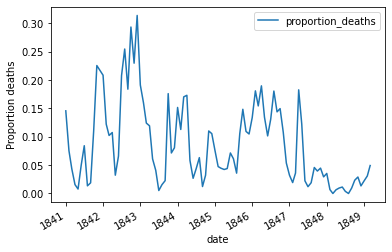

In [7]:
ax = monthly.plot(x="date", y="proportion_deaths")
ax.set_ylabel("Proportion deaths")
plt.show()


task-6:
Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory.
The effect of handwashing is made even more clear if we highlight this in the graph.

<AxesSubplot:xlabel='date'>

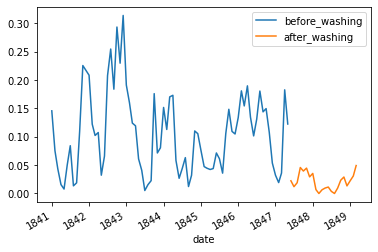

In [8]:
handwashing_start = pd.to_datetime('1847-06-01')
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]
ax = before_washing.plot(x='date', y='proportion_deaths', label='before_washing') 
after_washing.plot(x='date', y='proportion_deaths', label='after_washing', ax=ax)

task-7:

In [9]:
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.0839566075118334

task-8:
To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval,here calculated using the bootstrap method

In [10]:
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.101803
0.975   -0.067307
dtype: float64

In [12]:
doctors_should_wash_their_hands = True